<a href="https://colab.research.google.com/github/amaluvincent/Fake-News-Detection/blob/main/Fake_news_detection_NLP_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Setting up the environment

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn nltk
!pip install tensorflow keras
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=67ac6b9a1686052e3947dd8cd645b736a92f7e64f8d008a459eb8d8a9894b8b7
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# 2.Importing libraraies

In [18]:
# import necessary libabaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import feature_extraction, linear_model, model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import Counter
#import shap
#from scipy.sparse import issparse
#from lime.lime_text import LimeTextExplainer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


# 3.Load dataset

In [19]:
# Load the ISOT dataset
true_news = pd.read_csv('/content/True.csv')
fake_news =  pd.read_csv('/content/Fake.csv')

# checking the size of each files
print('true:',true_news.shape)
print('fake:', fake_news.shape)


true: (21417, 4)
fake: (23481, 4)


# 4. Data cleaning and preparation

In [20]:
# Add a label to each dataframe
true_news['label'] = 0   # 0 for legitimate news
fake_news['label'] = 1   # 1 for fake news

# Combine both datasets
df = pd.concat([true_news, fake_news],ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)  # shuffle the data

# Print the combined dataset (first few rows)
print(df.head(5))
print(df.shape)



                                               title  \
0  FLASHBACK: HILLARY COURTS ILLEGAL ALIEN VOTE B...   
1  OBAMA LIED To Protect Hillary..New Wikileaks E...   
2  Trump vows to reopen, or toss, NAFTA pact with...   
3  BREAKING: CLINTON FOUNDATION FINDS $26 MILLION...   
4   Neo-Nazis Think They Know Exactly Who Is Resp...   

                                                text          subject  \
0  As it turns out, 67 year old Hillary Cinton us...  Government News   
1  Remember Combetta is Hillary s Oh Sh*t IT guy:...         politics   
2  MONESSEN, Pennsylvania/WASHINGTON (Reuters) - ...     politicsNews   
3  The Clintons found more money $26 million more...         politics   
4  After evidence surfaced that suggested Russia ...             News   

                date  label  
0       Apr 16, 2015      1  
1       Oct 25, 2016      1  
2     June 28, 2016       0  
3       May 22, 2015      1  
4  February 14, 2017      1  
(44898, 5)


In [5]:
# Check for missing values
print("Missing values in dataset:\n", df.isnull().sum())
df.dropna(inplace=True)  # Drop any rows with missing values

Missing values in dataset:
 title      0
text       0
subject    0
date       0
label      0
dtype: int64


In [6]:
# print dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB
None


In [7]:
# Removing unnecessary column(date)
df = df.drop(columns=["date"])
print(df.head())

                                               title  \
0  OBAMA’S LAST MOVE: Here’s How He’ll Force Subu...   
1   BREAKING: Trump Supporters Busted By FBI For ...   
2   The Newest Clinton Email Scandal Actually PRO...   
3  OUTRAGEOUS: Top15 Examples Of How Radical We’v...   
4  Panama to send immigration envoys to China as ...   

                                                text          subject  label  
0  Obama and HUD want to give one last freebie to...  Government News      1  
1  The FBI thwarted an act of domestic terrorism ...             News      1  
2  On Thursday, the New York Times published an a...             News      1  
3  This is not a war we can expect our children t...        left-news      1  
4  PANAMA CITY (Reuters) - Panama s government wi...        worldnews      0  


In [8]:
# Removing unnecessary column(title)
df = df.drop(columns=["title"])
print(df.head())

                                                text          subject  label
0  Obama and HUD want to give one last freebie to...  Government News      1
1  The FBI thwarted an act of domestic terrorism ...             News      1
2  On Thursday, the New York Times published an a...             News      1
3  This is not a war we can expect our children t...        left-news      1
4  PANAMA CITY (Reuters) - Panama s government wi...        worldnews      0


In [21]:
# Define stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to calculate changes per preprocessing step
def analyze_preprocessing(text):
    if pd.isnull(text) or text.strip() == "":  # Handle NaN or empty string input
        return {
            'Lowercasing Change (%)': 0,
            'Non-Alpha Removed (%)': 0,
            'Stopwords Removed (%)': 0,
            'Lemmatization Changes (%)': 0,
            'Cleaned Text': ''
        }
    # Initial count of tokens
    original_tokens = word_tokenize(text)   # Tokenization
    total_tokens = len(original_tokens)

     # Check if there are no tokens, return 0 for all changes
    if total_tokens == 0:
        return {
            'Lowercasing Change (%)': 0,
            'Non-Alpha Removed (%)': 0,
            'Stopwords Removed (%)': 0,
            'Lemmatization Changes (%)': 0,
        }

    # Step-by-step preprocessing
    lowercased_text = text.lower()    # Lowercasing
    lowercased_tokens = word_tokenize(lowercased_text)    #Tokenization
    alphabetic_tokens = [word for word in lowercased_tokens if word.isalpha()]  #Remove non-alphabetic tokens
    non_stopword_tokens = [word for word in alphabetic_tokens if word not in stop_words]  # Stopword removal
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in non_stopword_tokens]    # Lemmatization

    # Calculate changes as percentages
    #total_tokens = len(original_tokens)
    lowercasing_change = 100 if any(word.isupper() for word in original_tokens) else 0
    non_alpha_removed = (len(lowercased_tokens) - len(alphabetic_tokens)) / total_tokens * 100 if total_tokens > 0 else 0
    stopword_removed = (len(alphabetic_tokens) - len(non_stopword_tokens)) / total_tokens * 100 if total_tokens > 0 else 0
    lemmatization_changes = sum(1 for orig, lemma in zip(non_stopword_tokens, lemmatized_tokens) if orig != lemma) / total_tokens * 100 if non_stopword_tokens else 0

     # Join the lemmatized tokens to form the cleaned text
    cleaned_text = ' '.join(lemmatized_tokens)

    return {
        'Lowercasing Change (%)': lowercasing_change,
        'Non-Alpha Removed (%)': non_alpha_removed,
        'Stopwords Removed (%)': stopword_removed,
        'Lemmatization Changes (%)': lemmatization_changes,
        'Cleaned Text': cleaned_text
    }

# Apply the analysis function to each text in the dataframe and create a new dataframe to store results
df[['Lowercasing Change (%)', 'Non-Alpha Removed (%)', 'Stopwords Removed (%)',
    'Lemmatization Changes (%)','cleaned_text']] = df['text'].apply(lambda x: pd.Series(analyze_preprocessing(x)))

# Display average percentages across all text entries
average_changes = df[['Lowercasing Change (%)', 'Non-Alpha Removed (%)',
                      'Stopwords Removed (%)', 'Lemmatization Changes (%)']].mean()
print("Average Changes across all texts:\n", average_changes)


Average Changes across all texts:
 Lowercasing Change (%)       94.683505
Non-Alpha Removed (%)        13.359675
Stopwords Removed (%)        36.966758
Lemmatization Changes (%)     5.644744
dtype: float64


In [22]:
# Print the original and cleaned text
print(df[['text','cleaned_text','Lowercasing Change (%)', 'Non-Alpha Removed (%)',
          'Stopwords Removed (%)', 'Lemmatization Changes (%)']].head(10))  # Display the first 10 rows

                                                text  \
0  As it turns out, 67 year old Hillary Cinton us...   
1  Remember Combetta is Hillary s Oh Sh*t IT guy:...   
2  MONESSEN, Pennsylvania/WASHINGTON (Reuters) - ...   
3  The Clintons found more money $26 million more...   
4  After evidence surfaced that suggested Russia ...   
5  BANGKOK (Reuters) - The systematic persecution...   
6  LONDON (Reuters) - British police arrested a s...   
7  GENEVA/LONDON (Reuters) - Zimbabwean President...   
8  Donald Trump has chosen the worst of the worst...   
9  CINCINNATI (Reuters) - Democratic presidential...   

                                        cleaned_text  Lowercasing Change (%)  \
0  turn year old hillary cinton used hear grandpa...                     100   
1  remember combetta hillary oh sh guy breaking f...                     100   
2  monessen reuters republican presidential candi...                     100   
3  clinton found money million using position gov...           

In [11]:
# Check for NaN values in 'cleaned_text' after preprocessing
missing_values = df['cleaned_text'].isna().sum()
print(f"Number of NaN values in 'cleaned_text': {missing_values}")


Number of NaN values in 'cleaned_text': 0


# 5.Exploratory Data Analysis

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64


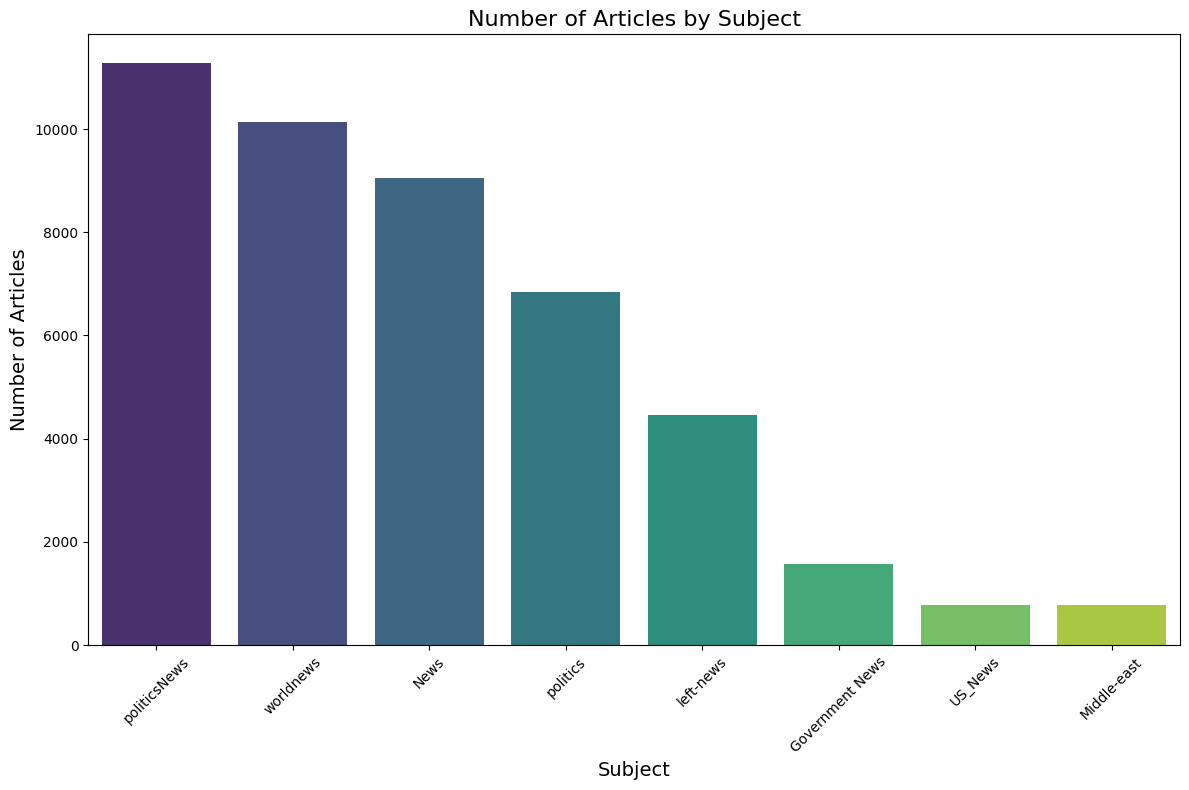

In [12]:
# Count the number of articles by subject
subject_counts = df['subject'].value_counts()
print(subject_counts)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=subject_counts.index, y=subject_counts.values, palette='viridis')
plt.title('Number of Articles by Subject', fontsize=16)
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Sentiment Analysis
False news often evokes extreme emotions, while legitimate news has a balanced tone. Machine learning models can improve accuracy by incorporating sentiment ratings into their models. This can reveal emotional language patterns, improve word choice, or focus on specific word types.

In [23]:
sia = SentimentIntensityAnalyzer()
# Step 1: Calculate Sentiment Scores for Each Article
df['sentiment_compound'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_pos'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['pos'])
df['sentiment_neg'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['neg'])
df['sentiment_neu'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['neu'])


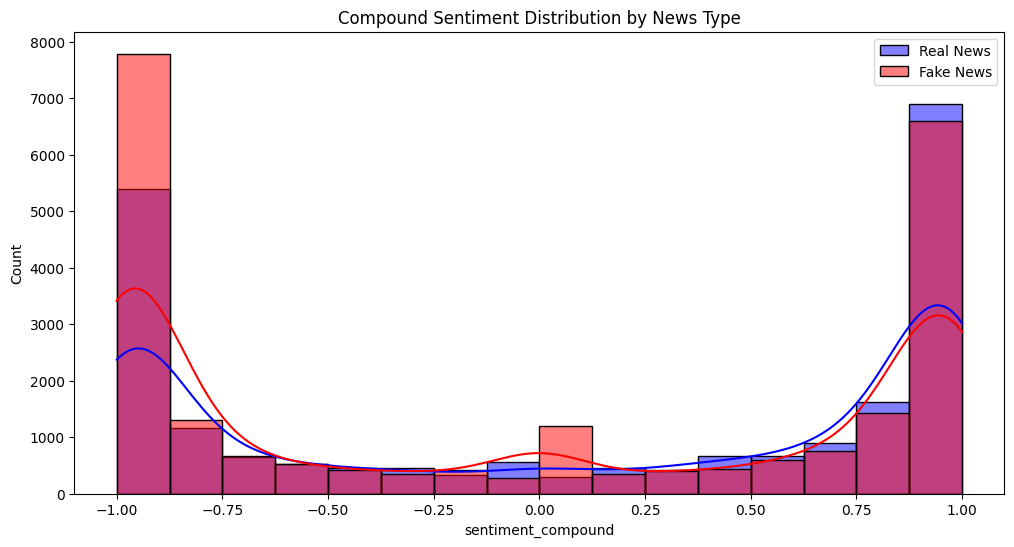

In [24]:
#  Visualize Sentiment Distributions by News Type (Fake vs Real)

# Compound Sentiment Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['sentiment_compound'], color='blue', label='Real News', kde=True)
sns.histplot(df[df['label'] == 1]['sentiment_compound'], color='red', label='Fake News', kde=True)
plt.title("Compound Sentiment Distribution by News Type")
plt.legend()
plt.show()

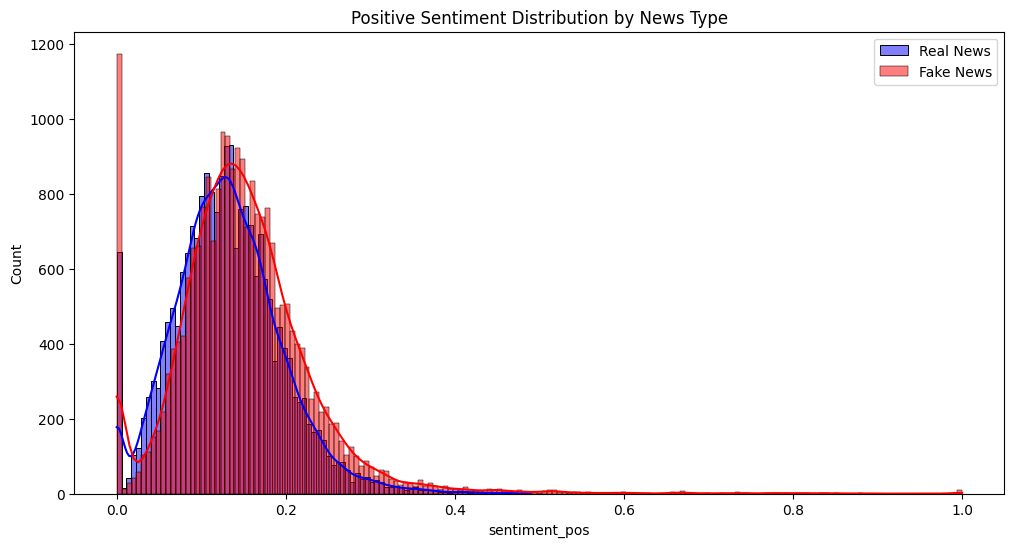

In [25]:
# Positive Sentiment Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['sentiment_pos'], color='blue', label='Real News', kde=True)
sns.histplot(df[df['label'] == 1]['sentiment_pos'], color='red', label='Fake News', kde=True)
plt.title("Positive Sentiment Distribution by News Type")
plt.legend()
plt.show()


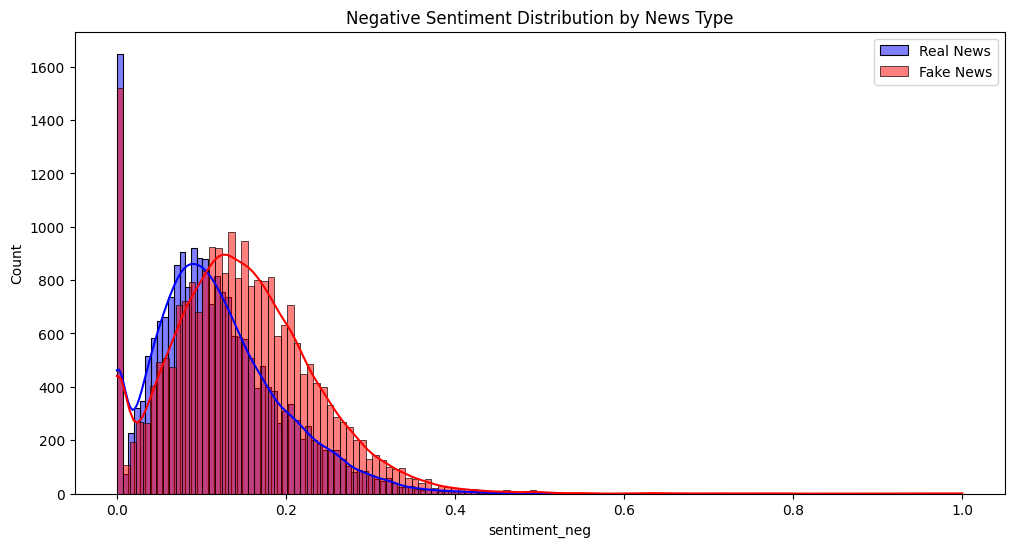

In [26]:
# Negative Sentiment Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df[df['label'] == 0]['sentiment_neg'], color='blue', label='Real News', kde=True)
sns.histplot(df[df['label'] == 1]['sentiment_neg'], color='red', label='Fake News', kde=True)
plt.title("Negative Sentiment Distribution by News Type")
plt.legend()
plt.show()

label
1    23481
0    21417
Name: count, dtype: int64


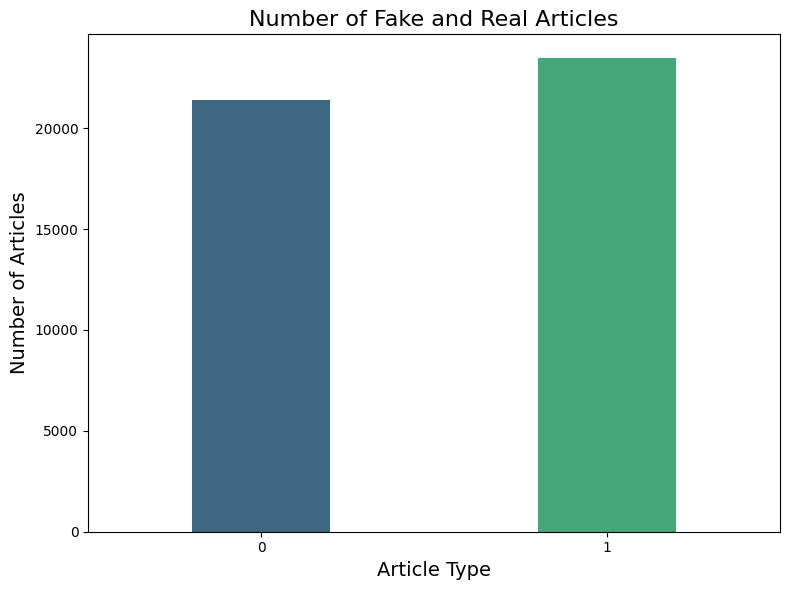

In [27]:
# How many fake and real articles?
article_counts = df['label'].value_counts()
print(article_counts)

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=article_counts.index, y=article_counts.values,palette='viridis', width=0.4)
plt.title('Number of Fake and Real Articles', fontsize=16)
plt.xlabel('Article Type', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


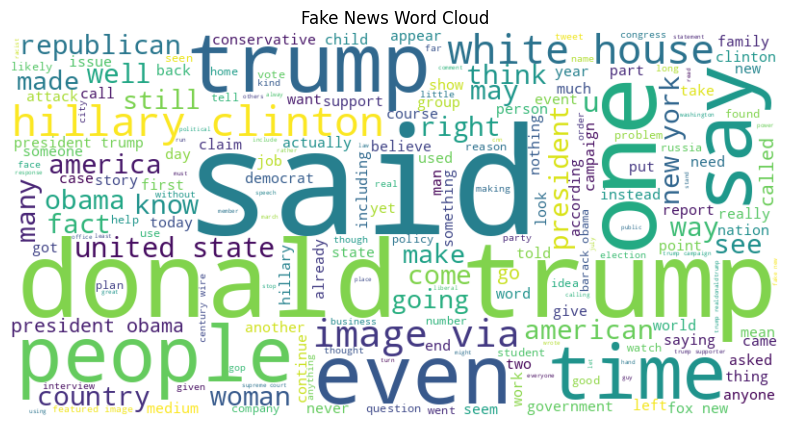

In [28]:
# Word cloud for fake news
fake_words = ' '.join(df[df['label'] == 1]['cleaned_text'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Fake News Word Cloud')
plt.show()

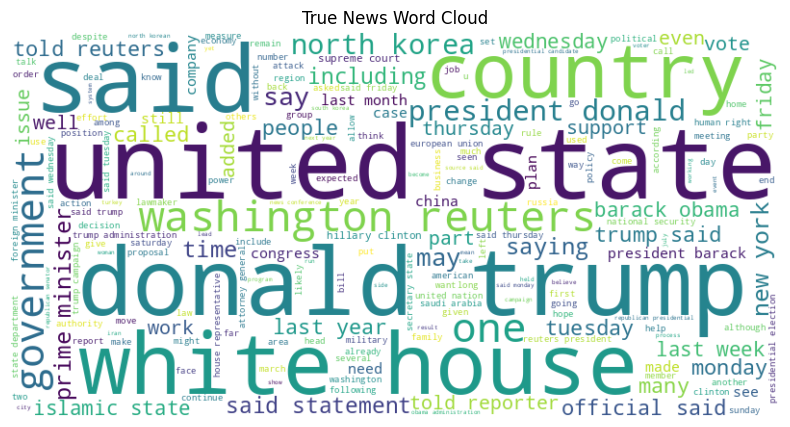

In [29]:
# Word cloud for true news

true_words = ' '.join(df[df['label'] == 0]['cleaned_text'])
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('True News Word Cloud')
plt.show()

Top 20 words in Fake News: [('trump', 74403), ('said', 31149), ('president', 26340), ('people', 26098), ('one', 23812), ('would', 23461), ('state', 22072), ('clinton', 18717), ('like', 18207), ('obama', 17920), ('time', 17885), ('donald', 17235), ('american', 16093), ('republican', 16061), ('say', 15528), ('also', 15243), ('year', 14843), ('news', 14198), ('new', 14198), ('u', 14172)]
Top 20 words in Real News: [('said', 99037), ('trump', 54280), ('state', 36243), ('would', 31526), ('reuters', 28412), ('president', 26939), ('republican', 22098), ('government', 19433), ('year', 18721), ('house', 16906), ('new', 16784), ('also', 15946), ('united', 15576), ('people', 15207), ('party', 14964), ('official', 14575), ('told', 14244), ('country', 13948), ('election', 13910), ('could', 13709)]


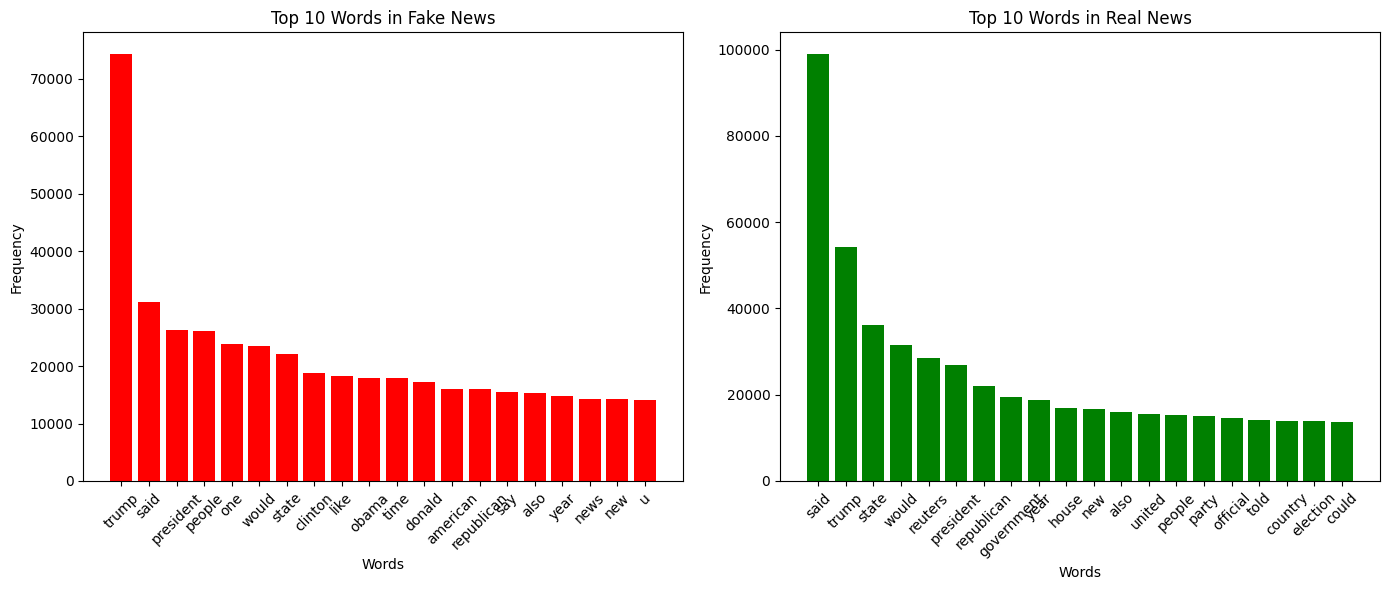

In [30]:
# Most  frequent words counter
# Fake News Word Frequency
fake_words = ' '.join(df[df['label'] == 1]['cleaned_text']).split()
counter_fake = Counter(fake_words)
top_fake = counter_fake.most_common(20)
print("Top 20 words in Fake News:", counter_fake.most_common(20))

# Real News Word Frequency
real_words = ' '.join(df[df['label'] == 0]['cleaned_text']).split()
counter_real = Counter(real_words)
top_real = counter_real.most_common(20)
print("Top 20 words in Real News:", counter_real.most_common(20))

# Unpack the top words and their counts for fake and real news
fake_words_list, fake_counts = zip(*top_fake)
real_words_list, real_counts = zip(*top_real)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Fake News Plot
axes[0].bar(fake_words_list, fake_counts, color='red')
axes[0].set_title('Top 10 Words in Fake News')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(fake_words_list, rotation=45)

# Real News Plot
axes[1].bar(real_words_list, real_counts, color='green')
axes[1].set_title('Top 10 Words in Real News')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].set_xticklabels(real_words_list, rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

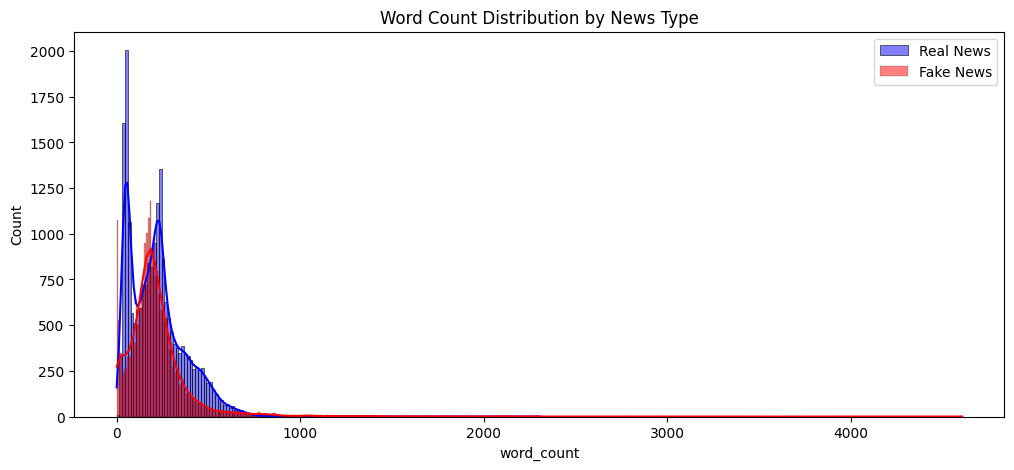

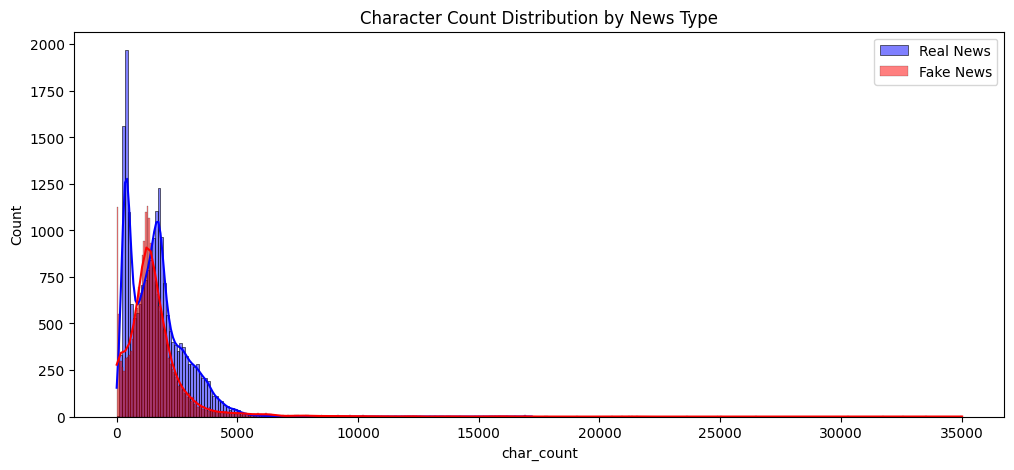

In [17]:
# Word count and sentence length analysis
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))
df['char_count'] = df['cleaned_text'].apply(len)

# Visualize word and character count distributions
plt.figure(figsize=(12, 5))
sns.histplot(df[df['label'] == 0]['word_count'], color='blue', label='Real News', kde=True)
sns.histplot(df[df['label'] == 1]['word_count'], color='red', label='Fake News', kde=True)
plt.title("Word Count Distribution by News Type")
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df[df['label'] == 0]['char_count'], color='blue', label='Real News', kde=True)
sns.histplot(df[df['label'] == 1]['char_count'], color='red', label='Fake News', kde=True)
plt.title("Character Count Distribution by News Type")
plt.legend()
plt.show()

# 6. Feature Extraction
Convert the text into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency).
ngram_range=(1, 2) indicates that the TF-IDF features will contain both unigrams (single words) and bigrams (two-word combinations).
This configuration enables your model to recognise both single words and typical two-word phrases, which might be crucial for differentiating between authentic and fraudulent news.



In [31]:
# Use TF-IDF for vectorization with n-gram
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(df['cleaned_text'])
y = df['label']

# 7.Training & Testing Data

In [32]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

# Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (35918, 5000)
y_train shape: (35918,)
X_test shape: (8980, 5000)
y_test shape: (8980,)


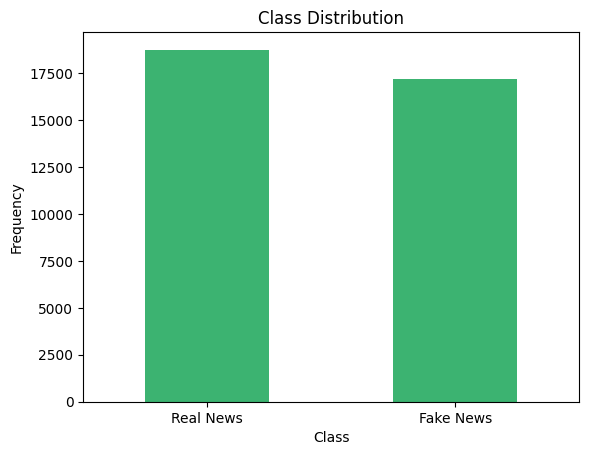

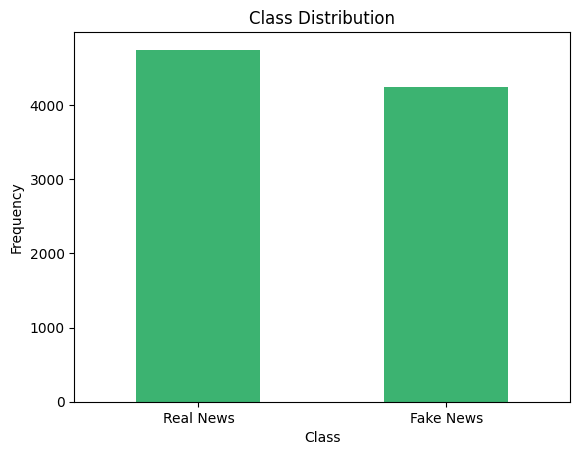

In [33]:
#. Evaluate Class Distribution
#Checking the distribution of our classes in the training and test sets:


# Plot class distribution
def plot_class_distribution(y):
    y.value_counts().plot(kind='bar', color='mediumseagreen')
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.xticks(ticks=[0, 1], labels=['Real News', 'Fake News'], rotation=0)
    plt.show()

# Plot for training set
plot_class_distribution(y_train)

# Plot for test set
plot_class_distribution(y_test)


# 7. Model Training & Evaluation

Logistic Regression:
Random Forest:
Support Vector Machine:

In [1]:
# Define the three models to compare
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear',probability=True, random_state=42)  # Added probabilit=True for SVM
}

NameError: name 'LogisticRegression' is not defined

In [ ]:
# Train models and evaluate performance
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1] if  hasattr(model,'predict_proba') else model.decision_function(X_test))

    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC-AUC': roc_auc}

    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Logistic Regression Results:
Accuracy: 0.9882, Precision: 0.9913, Recall: 0.9863, F1 Score: 0.9888, ROC-AUC: 0.9989
Confusion Matrix:
 [[4196   41]
 [  65 4678]]

Random Forest Results:
Accuracy: 0.9974, Precision: 0.9987, Recall: 0.9964, F1 Score: 0.9976, ROC-AUC: 1.0000
Confusion Matrix:
 [[4231    6]
 [  17 4726]]


In [ ]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:\n", results_df)


Model Performance Comparison:
                      Accuracy  Precision    Recall  F1 Score   ROC-AUC
Logistic Regression  0.987973   0.988050  0.988894  0.988471  0.998952
Random Forest        0.997216   0.997862  0.996796  0.997329  0.999885
SVM                  0.993096   0.993801  0.992952  0.993376  0.993102


# Custom Example
To check the accuracy and performance of the models i checked with  some out-of-sample-data

In [ ]:
# Step 2: Define a Function to Test Custom Examples
def preprocess_and_predict(text, model, tfidf_vectorizer):
    import re
    #from nltk.corpus import stopwords
    #import nltk
    #nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

    # Cleaning the input text to match training preprocessing
    def clean_text(text):
        text = text.lower()
        text = re.sub(r"http\S+|www\S+|https\S+", '', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = " ".join([word for word in text.split() if word not in stop_words])
        return text

    # Apply cleaning to the input text
    cleaned_text = clean_text(text)
    # Transform the text using the trained TF-IDF vectorizer
    transformed_text = tfidf_vectorizer.transform([cleaned_text])

    # Predict with the model
    prediction = model.predict(transformed_text)
    prediction_prob = model.predict_proba(transformed_text)

    # Display results
    label = 'Fake News' if prediction[0] == 1 else 'Real News'
    confidence = max(prediction_prob[0]) * 100  # confidence in percentage
    print(f"Prediction: {label}")
    print(f"Confidence: {confidence:.2f}%")


In [ ]:
# Step 3: Testing Custom Examples
# Choose a model for testing (e.g., the best-performing one)
chosen_model = models['Logistic Regression']  # replace with the best-performing model based on your evaluation

# Define custom examples to test
test_texts = [
    "Breaking: Shocking truth revealed about government secrets!",
    "Scientists have confirmed that vaccines are effective against new variants.",
    "Experts claim that the world is flat and provide evidence to prove it.",
    "The local council announced plans to improve public transportation next year."
]

# Test each example
print("\nTesting Custom Examples:")
for text in test_texts:
    print("\nText:", text)
    preprocess_and_predict(text, chosen_model, tfidf_vectorizer)